### Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.


In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# Создание  своего датасета
data = {'salary': [random.randint(40000, 80000) for _ in range(1000)],
        'city': [random.choice(['Bishkek', 'Moscow', 'London']) for _ in range(1000)],
        'age': [random.randint(30, 65) for _ in range(1000)],
        'vacation_prefer': [random.choice(['Shopping', 'Beach holiday']) for _ in range(1000)],
        'transport_prefer': [random.choice(['auto', 'plane']) for _ in range(1000)],
        'target': [random.choice(['London', 'Moscow']) for _ in range(1000)]}

df = pd.DataFrame(data)



In [3]:
print(df)

     salary     city  age vacation_prefer transport_prefer  target
0     51268   London   56   Beach holiday             auto  London
1     57594   Moscow   31   Beach holiday            plane  Moscow
2     77617   Moscow   63   Beach holiday            plane  London
3     41857  Bishkek   62   Beach holiday            plane  Moscow
4     74060  Bishkek   44   Beach holiday            plane  Moscow
..      ...      ...  ...             ...              ...     ...
995   63070   London   31        Shopping             auto  London
996   56558   London   42   Beach holiday             auto  London
997   55464   Moscow   49        Shopping             auto  Moscow
998   43870   London   42   Beach holiday            plane  London
999   58139  Bishkek   35   Beach holiday             auto  London

[1000 rows x 6 columns]


In [4]:
df.isnull().sum()

salary              0
city                0
age                 0
vacation_prefer     0
transport_prefer    0
target              0
dtype: int64

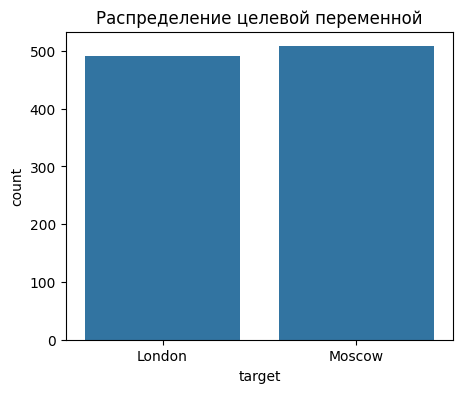

In [5]:
plt.figure(figsize=(5, 4))
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.show()

In [6]:
#Преобразовать категориальные данные в числовые, используя panadas.get_dummies.

df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])


# Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Создание и обучение модели
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Применение кросс-валидации
cross_val_scores = cross_val_score(clf, X, y, cv=5)
print(f'Оценки перекрестной проверки: {cross_val_scores}')
print(f'Средняя оценка: {cross_val_scores.mean()}')


Оценки перекрестной проверки: [0.5   0.495 0.445 0.46  0.43 ]
Средняя оценка: 0.466


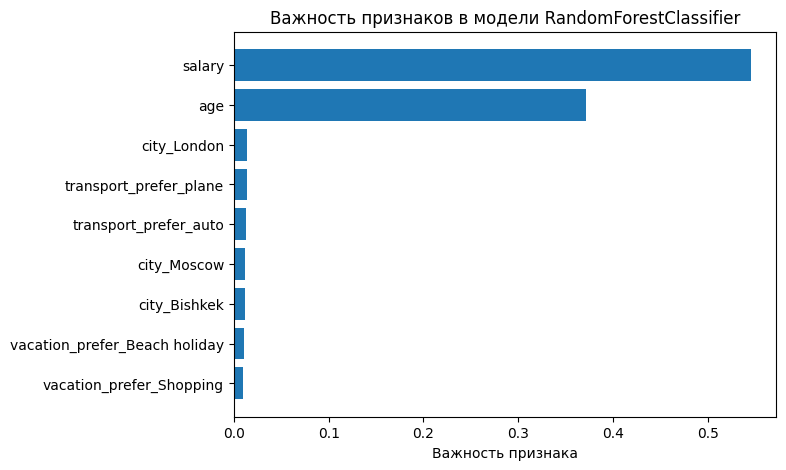

In [9]:
# Визуализация важности признаков
feature_importances = clf.feature_importances_
features = X.columns

# Сортировка признаков по важности
indices = feature_importances.argsort()

plt.figure(figsize=(7, 5))
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Важность признака")
plt.title("Важность признаков в модели RandomForestClassifier")
plt.show()

In [10]:
# Предсказание и оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy}')


Точность: 0.53


In [11]:

print('Отчет о классификации:')
print(classification_report(y_test, y_pred))

Отчет о классификации:
              precision    recall  f1-score   support

      London       0.50      0.53      0.52        94
      Moscow       0.56      0.53      0.54       106

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



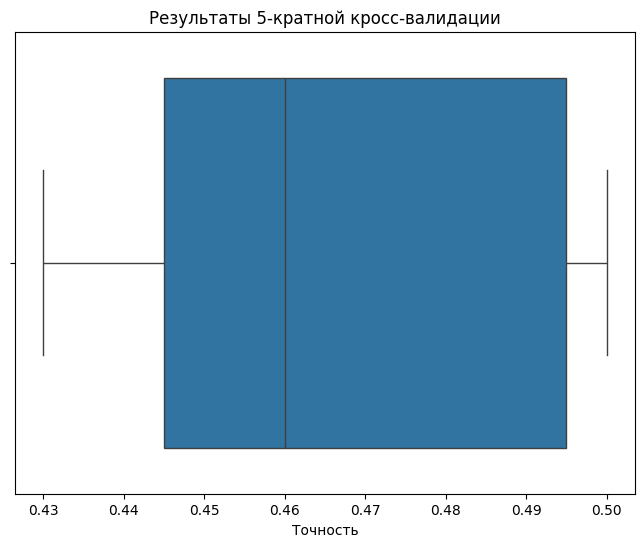

In [12]:
# Визуализация результатов кросс-валидации
plt.figure(figsize=(8, 6))
sns.boxplot(x=cross_val_scores)
plt.title('Результаты 5-кратной кросс-валидации')
plt.xlabel('Точность')
plt.show()

In [13]:
# Создание случайных данных для предсказания
random_data = {'salary': [random.randint(40000, 80000)],
               'age': [random.randint(30, 65)],
               'city_Bishkek': [0],
               'city_London': [1],
               'city_Moscow': [0],
               'vacation_prefer_Beach holiday': [1],
               'vacation_prefer_Shopping': [0],
               'transport_prefer_auto': [0],
               'transport_prefer_plane': [1]}

df_random = pd.DataFrame(random_data)

# Предсказание на случайных данных
prediction = clf.predict(df_random)
print(f'Предсказанный город: {prediction[0]}')


Предсказанный город: London


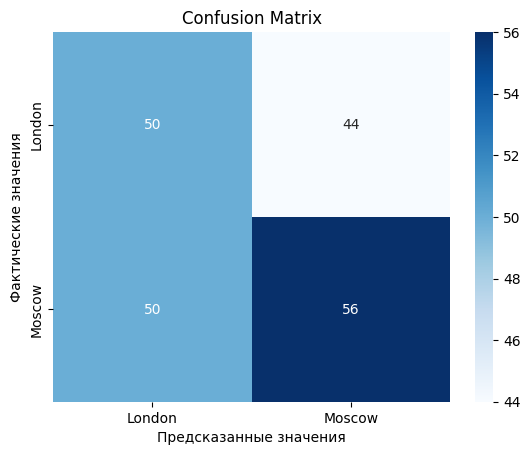

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Предсказание 
y_pred = clf.predict(X_test)

# Визуализация
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Пример тюнинга параметров с использованием решетчатого поиска
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Наилучшая оценка модели: {grid_search.best_score_}')

Лучшие параметры: {'max_depth': 20, 'n_estimators': 200}
Наилучшая оценка модели: 0.47750000000000004


 Выбран и применен классификатор RandomForestClassifier  из библиотеки scikit-learn.
 Для оценки эффективности модели использована перекрестная проверка с 5 уровнями,также использован решетчатый поиск для настройки параметров модели и повышения ее результативности.

In [18]:
# Предсказание и оценка улучшенной модели
best_model.fit(X_train, y_train)  # Переобучение модели с лучшими параметрами на всей обучающей выборке

# Предсказание на тестовых данных
y_pred_best = best_model.predict(X_test)

# Оценка модели
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Точность на тестовой выборке с использованием лучшей модели: {accuracy_best}')

Точность на тестовой выборке с использованием лучшей модели: 0.52


In [19]:
# Отделение признаков (X) и целевой переменной (y)
X = df.drop(['target'], axis=1)
y = df['target'].values

ValueError: could not convert string to float: 'Bishkek'